In [1]:
#Loading the famous MNIST Handwritten digit data
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
#Loading matplot lib for sample visualization
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

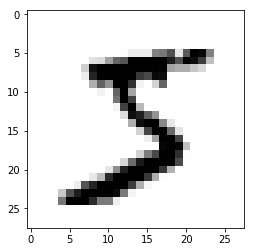

In [6]:
single_image =x_train[0]
plt.imshow(single_image,cmap='gray_r')

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
#As ouput column contains output digit so needed to do hot encoding 
from keras.utils import to_categorical

In [9]:
y_cat_test=to_categorical(y_test,10)

In [10]:
y_cat_train=to_categorical(y_train,10)

In [11]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
single_image.min()

0

In [13]:
#scaling the data in range of 0-1 as that is needed for tensor flow to understand
x_train =x_train/255
x_test=x_test/255

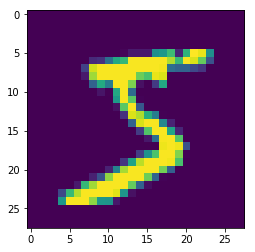

In [14]:
plt.imshow(x_train[0])

In [15]:
#reshaping the image to (sample_number,height,width,colorchannel)
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
#Below code is for cnn network creation or model

In [19]:
from keras.models import Sequential

In [20]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [21]:
model =Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
__________

In [26]:
model.fit(x_train,y_cat_train,epochs=12,batch_size=128,validation_data=(x_test, y_cat_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0604 - acc: 0.9824 - val_loss: 0.0352 - val_acc: 0.9886
Epoch 2/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0506 - acc: 0.9851 - val_loss: 0.0327 - val_acc: 0.9880
Epoch 3/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0473 - acc: 0.9866 - val_loss: 0.0331 - val_acc: 0.9910
Epoch 4/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0442 - acc: 0.9871 - val_loss: 0.0239 - val_acc: 0.9923
Epoch 5/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0417 - acc: 0.9881 - val_loss: 0.0244 - val_acc: 0.9929
Epoch 6/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0422 - acc: 0.9884 - val_loss: 0.0226 - val_acc: 0.9926
Epoch 7/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0413 - acc: 0.9881 - val_loss: 0.0260 - val_acc

In [29]:
model.metrics_names

['loss', 'acc']

In [30]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 4s 425us/step


[0.024108406071133685, 0.9923]

In [31]:
from sklearn.metrics import classification_report

In [32]:
predictions=model.predict_classes(x_test)

In [33]:
print (classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       980
          1       1.00      0.99      1.00      1135
          2       0.99      0.99      0.99      1032
          3       0.99      1.00      0.99      1010
          4       1.00      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.99      0.99      0.99       974
          9       0.99      0.99      0.99      1009

avg / total       0.99      0.99      0.99     10000



In [47]:
#Saving the model for future use 
model.save('test_digit.h5')

In [48]:
import numpy as np
from keras.preprocessing import image
import cv2

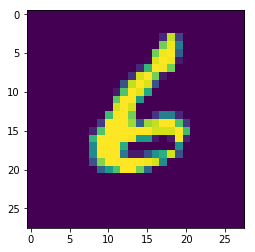

In [49]:
#loading the sample_digit image and reshapping it for form (samplenumber,height,width,colorchannel)
digit_file = 'sample_digit.jpg'
digit_img = image.load_img(digit_file, target_size=(28,28))
digit_img = image.img_to_array(digit_img)
gray=cv2.cvtColor(digit_img,cv2.COLOR_BGR2GRAY)
gray = gray/255
plt.imshow(gray)
gray = gray.reshape(gray.shape[0],gray.shape[1],1)
test_image = np.expand_dims(gray, axis = 0)

In [50]:
result = model.predict_classes(test_image, verbose=0)
print(result[0])

6


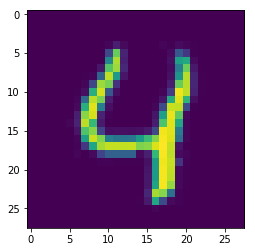

In [51]:
#loading the sample_digit image and reshapping it for form (samplenumber,height,width,colorchannel)
#Here it has to be converted where image is having white background and text in black but in actually
#Mnist data set is opposite so flipping the background and foreground 
digit_file2 = 'sample_digit2.jpg'
digit_img2 = image.load_img(digit_file2, target_size=(28,28))
digit_img2 = image.img_to_array(digit_img2)
gray2=cv2.cvtColor(digit_img2,cv2.COLOR_BGR2GRAY)
#Below one is needed for flipping the foreground with background
gray2 = 255-gray2
##########################################################
gray2 = gray2/255
plt.imshow(gray2)
gray2 = gray2.reshape(gray.shape[0],gray2.shape[1],1)
test_image2 = np.expand_dims(gray2, axis = 0)

In [52]:
result = model.predict_classes(test_image2, verbose=0)
print(result[0])

4


In [53]:
#load the model from h5 and use it for predictions 
from keras.models import load_model

In [54]:
loaded_model = load_model('test_digit.h5')

In [55]:
result = loaded_model.predict_classes(test_image2, verbose=0)
print(result[0])

4
